<a href="https://colab.research.google.com/github/CezarHick/ProjetoGrupo_Mod4/blob/main/projetogrupo_mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do DataFrame #

In [ ]:
!pip install dtype_diet
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from dtype_diet import report_on_dataframe, optimize_dtypes

In [ ]:
# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-12.csv', sep=';')
dez = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-11.csv', sep=';')

# Junta os dois DataFrames
df = pd.concat([nov, dez])

In [ ]:
# Ver quantas entradas Nulas e não nulas tem.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101996 entries, 0 to 52542
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     101996 non-null  object 
 1   Estado - Sigla     101996 non-null  object 
 2   Municipio          101996 non-null  object 
 3   Revenda            101996 non-null  object 
 4   CNPJ da Revenda    101996 non-null  object 
 5   Nome da Rua        101996 non-null  object 
 6   Numero Rua         101961 non-null  object 
 7   Complemento        23384 non-null   object 
 8   Bairro             101810 non-null  object 
 9   Cep                101996 non-null  object 
 10  Produto            101996 non-null  object 
 11  Data da Coleta     101996 non-null  object 
 12  Valor de Venda     101996 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  101996 non-null  object 
 15  Bandeira           101996 non-null  object 
dtypes: 

In [ ]:
# Transforma valor da coluna 'Valor de Venda' em float e Date em Datatime
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype('float') # todos nao nulos
df['Data da Coleta'] = pd.to_datetime(df_nov['Data da Coleta'], format="%d/%m/%Y")
df['Dia da Coleta'] = df_nov['Data da Coleta'].dt.day

In [ ]:
# Ver quantas entradas Nulas e não nulas tem.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101996 entries, 0 to 52542
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     101996 non-null  object        
 1   Estado - Sigla     101996 non-null  object        
 2   Municipio          101996 non-null  object        
 3   Revenda            101996 non-null  object        
 4   CNPJ da Revenda    101996 non-null  object        
 5   Nome da Rua        101996 non-null  object        
 6   Numero Rua         101961 non-null  object        
 7   Complemento        23384 non-null   object        
 8   Bairro             101810 non-null  object        
 9   Cep                101996 non-null  object        
 10  Produto            101996 non-null  object        
 11  Data da Coleta     98906 non-null   datetime64[ns]
 12  Valor de Venda     101996 non-null  float64       
 13  Valor de Compra    0 non-null       float64  

In [ ]:
# Visualize as primeiras linhas do DataFrame
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA,01/12/2023,5.59,NaN,R$ / litro,BRANCA
1,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA ADITIVADA,01/12/2023,5.74,NaN,R$ / litro,BRANCA
2,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,ETANOL,01/12/2023,4.35,NaN,R$ / litro,BRANCA
3,S,PR,ARAPONGAS,AUTO POSTO CATUAI LTDA,07.900.742/0004-65,RUA GATURAMO,475,NaN,JARDIM PRIMAVERA,86702-000,GASOLINA,01/12/2023,5.52,NaN,R$ / litro,BRANCA
4,S,PR,ARAPONGAS,AUTO POSTO CATUAI LTDA,07.900.742/0004-65,RUA GATURAMO,475,NaN,JARDIM PRIMAVERA,86702-000,GASOLINA ADITIVADA,01/12/2023,5.56,NaN,R$ / litro,BRANCA


In [ ]:
# Read data for November
df_nov = nov

In [ ]:
# Clean and preprocess columns in the November dataframe
df_nov['Valor de Venda'] = df_nov['Valor de Venda'].str.replace(',', '.').astype('float')
df_nov['Data da Coleta'] = pd.to_datetime(df_nov['Data da Coleta'], format="%d/%m/%Y")
df_nov['Dia da Coleta'] = df_nov['Data da Coleta'].dt.day

In [ ]:
# Generate and apply optimized data types for the November dataframe
proposed_df = report_on_dataframe(df_nov, unit="MB")
df_nov = optimize_dtypes(df_nov, proposed_df)

In [ ]:
# Read data for December
df_dez = dez

In [ ]:
# Clean and preprocess columns in the December dataframe
df_dez['Valor de Venda'] = df_dez['Valor de Venda'].str.replace(',', '.').astype('float')
df_dez['Data da Coleta'] = pd.to_datetime(df_dez['Data da Coleta'], format="%d/%m/%Y")
df_dez['Dia da Coleta'] = df_dez['Data da Coleta'].dt.day

In [ ]:
# Generate and apply optimized data types for the December dataframe
proposed_df = report_on_dataframe(df_dez, unit="MB")
df_dez = optimize_dtypes(df_dez, proposed_df)

In [ ]:
# Define a function to filter DataFrame and apply aggregation
def operation_df(df, column1, operation, product=None, column2=None):
    """
    Filter DataFrame and apply aggregation.

    Parameters: df, column1, product, column2, operation

    Returns: Aggregation result.
    """
    if (product and column2) is not None:
        # Apply aggregation to a specific product and column2 (if provided)
        result = df[df[column1] == product][column2].agg(operation)
        return result
    else:
        # Apply aggregation to the entire column1 (if product and column2 are not provided)
        result = df[column1].agg(operation)

In [ ]:
# List of products for which aggregation will be performed
product = ['GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL']

# **1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?**#

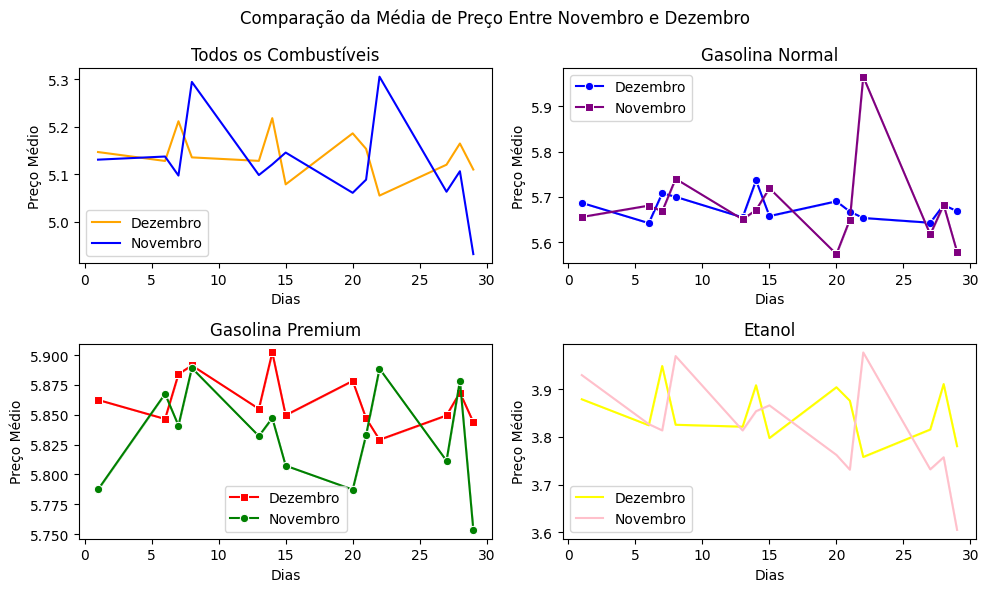

In [ ]:
 Agrupar por produto e dia da coleta, calculando o preço médio para novembro
df_nov1 = df_nov.groupby(['Produto','Dia da Coleta'])['Valor de Venda'].mean().reset_index()

# Agrupar por produto e dia da coleta, calculando o preço médio para dezembro
df_dez1 = df_dez.groupby(['Produto', 'Dia da Coleta'])['Valor de Venda'].mean().reset_index()

data_gas_nov = df_nov1[df_nov1['Produto']==product[0]]
data_gas_dez = df_dez1[df_dez1['Produto']==product[0]]

data_etn_nov = df_nov1[df_nov1['Produto']==product[2]]
data_etn_dez = df_dez1[df_dez1['Produto']==product[2]]

# Concatenar dois dataframes df_nov1 e df_dez1 em data_mimmax
data_mimmax = pd.concat([df_nov1, df_dez1])

# Converter a coluna 'Valor de Venda' para o tipo float
data_mimmax['Valor de Venda'].astype('float')

# Filtrar dados para cada tipo de produto (armazenado na lista 'product')
data_mimmax_gas = data_mimmax[data_mimmax['Produto']==product[0]]
max_gas_line = data_mimmax_gas['Valor de Venda'].max()
max_gas_line = [max_gas_line] * len(data_gas_nov['Dia da Coleta'])
max_gas_marker = data_mimmax_gas.nlargest(1, 'Valor de Venda')

min_gas_line = data_mimmax_gas['Valor de Venda'].min()
min_gas_line = [min_gas_line] * len(data_gas_nov['Dia da Coleta'])
min_gas_marker = data_mimmax_gas.nsmallest(1, 'Valor de Venda')


data_mimmax_etn = data_mimmax[data_mimmax['Produto']==product[2]]
max_etn_line = data_mimmax_etn['Valor de Venda'].max()
max_etn_line = [max_etn_line] * len(data_etn_nov['Dia da Coleta'])
max_etn_marker = data_mimmax_etn.nlargest(1, 'Valor de Venda')

min_etn_line = data_mimmax_etn['Valor de Venda'].min()
min_etn_line = [min_etn_line] * len(data_etn_nov['Dia da Coleta'])
min_etn_marker = data_mimmax_etn.nsmallest(1, 'Valor de Venda')

# Calcular os preços médios para cada dia de coleta em novembro
data_all_nov = df_nov.groupby(['Dia da Coleta'])['Valor de Venda'].mean().reset_index()

# Calcular os preços médios para cada dia de coleta em dezembro
data_all_dez = df_dez.groupby(['Dia da Coleta'])['Valor de Venda'].mean().reset_index()

# Mesclar os preços médios de novembro e dezembro no dia da coleta
data_all = pd.merge(data_all_nov, data_all_dez, on='Dia da Coleta', how='inner')

# Concatenar os preços médios de novembro e dezembro em data_all_minmax
data_all_minmax = pd.concat([data_all_dez, data_all_nov])

# Converter a coluna 'Valor de Venda' para o tipo float para data_all_minmax
all_max_y = data_all_minmax['Valor de Venda'].max()
all_max_y = [all_max_y] * len(data_all['Dia da Coleta'])
all_min_y = data_all_minmax['Valor de Venda'].min()
all_min_y = [all_min_y] * len(data_all['Dia da Coleta'])

all_max_marker = data_all_minmax.nlargest(1, 'Valor de Venda')
all_min_marker = data_all_minmax.nsmallest(1, 'Valor de Venda')

In [ ]:
all_fuels =[
    go.Scatter(
        x=data_all['Dia da Coleta'], y=data_all['Valor de Venda_x'],
        mode='lines', name='Novembro',
        line=dict(color='#0057e7', width=6),
        connectgaps=True,
        legend='legend1',
        legendgroup='group1'
    ),

    go.Scatter(
        x=data_all['Dia da Coleta'], y=data_all['Valor de Venda_y'],
        mode='lines', name='Dezembro',
        line=dict(color='#ffa700', width=6),
        connectgaps=True,
        legend='legend1',
        legendgroup='group1'
    ),

    go.Scatter(
        x=data_all['Dia da Coleta'], y=all_max_y,
        mode='lines',
        line=dict(color='#008744', width=4, dash='dashdot'),
        showlegend=False,
        legendgroup='group1'
    ),

    go.Scatter(
        x=data_all['Dia da Coleta'], y=all_min_y,
        mode='lines',
        line=dict(color='#d62d20', width=4, dash='dashdot'),
        showlegend=False,
        legendgroup='group1'
    ),

    go.Scatter(
        mode='markers',
        x=all_max_marker['Dia da Coleta'], y=all_max_marker['Valor de Venda'],
        marker=dict(symbol='circle', size=12, color='#008744'),
        showlegend=False,
        legend='legend1',
        legendgroup='group1'
    ),

    go.Scatter(
        mode='markers',
        x=all_min_marker['Dia da Coleta'], y=all_min_marker['Valor de Venda'],
        marker=dict(symbol='circle', size=12, color='#d62d20'),
        showlegend=False,
        legend='legend1',
        legendgroup='group1'
    )
]

gas =[
    go.Scatter(
        x=data_gas_nov['Dia da Coleta'], y=data_gas_nov['Valor de Venda'],
        mode='lines', name= 'Novembro',
        line=dict(color='#0057e7', width=6),
        legend='legend2',
        legendgroup='group2'
    ),

    go.Scatter(
        x=data_gas_dez['Dia da Coleta'], y=data_gas_dez['Valor de Venda'],
        mode='lines', name='Dezembro',
        line=dict(color='#ffa700', width=6),
        legend='legend2',
        legendgroup='group2'
    ),

    go.Scatter(
        x=data_gas_nov['Dia da Coleta'], y=max_gas_line,
        mode='lines',
        line=dict(color='#008744', width=6, dash='dashdot'),
        legend='legend2',
        showlegend=False,
        legendgroup='group2'
    ),

    go.Scatter(
        x=data_gas_nov['Dia da Coleta'], y=min_gas_line,
        mode='lines',
        line=dict(color='#d62d20', width=6, dash='dashdot'),
        showlegend=False,
        legend='legend2',
        legendgroup='group2'
    ),

    go.Scatter(
        x=max_gas_marker['Dia da Coleta'], y=max_gas_marker['Valor de Venda'],
        mode='markers',
        marker=dict(symbol='circle', size=12, color='#008744'),
        showlegend=False,
        legend='legend2',
        legendgroup='group2'
    ),

    go.Scatter(
        x=min_gas_marker['Dia da Coleta'], y=min_gas_marker['Valor de Venda'],
        mode='markers',
        marker=dict(symbol='circle', size=12, color='#d62d20'),
        showlegend=False,
        legend='legend2',
        legendgroup='group2'
    )
]

etn = [
    go.Scatter(
        x=data_etn_nov['Dia da Coleta'], y=data_etn_nov['Valor de Venda'],
        mode='lines', name= 'Novembro',
        line=dict(color='#0057e7', width=6),
        legend='legend3',
        legendgroup='group3'
    ),

    go.Scatter(
        x=data_etn_dez['Dia da Coleta'], y=data_etn_dez['Valor de Venda'],
        mode='lines', name='Dezembro',
        line=dict(color='#ffa700', width=6),
        legend='legend3',
        legendgroup='group3'
    ),

    go.Scatter(
        x=data_etn_nov['Dia da Coleta'], y=max_etn_line,
        mode='lines',
        line=dict(color='#008744', width=6, dash='dashdot'),
        legend='legend3',
        legendgroup='group3',
        showlegend=False
    ),

    go.Scatter(
        x=data_etn_nov['Dia da Coleta'], y=min_etn_line,
        mode='lines',
        line=dict(color='#d62d20', width=6, dash='dashdot'),
        showlegend=False,
        legend='legend3',
        legendgroup='group3'
    ),

    go.Scatter(
        x=max_etn_marker['Dia da Coleta'], y=max_etn_marker['Valor de Venda'],
        mode='markers',
        marker=dict(symbol='circle', size=12, color='#008744'),
        showlegend=False,
        legend='legend3',
        legendgroup='group3'
    ),

    go.Scatter(
        x=min_etn_marker['Dia da Coleta'], y=min_etn_marker['Valor de Venda'],
        mode='markers',
        marker=dict(symbol='circle', size=12, color='#d62d20'),
        showlegend=False,
        legend='legend3',
        legendgroup='group3'
    )
]

fig = go.Figure()

for trace in gas:
    fig.add_trace(trace)

for trace in all_fuels:
    fig.add_trace(trace)

for trace in etn:
    fig.add_trace(trace)

fig.update_layout(
    legend1=dict(title='Todos os Combustíveis', xref='container', yref='container', x=1, y=0.65),
    legend2=dict(title='Gasolina', xref='container', yref='container',x=0.958, y=0.50),
    legend3=dict(title='Etanol', xref='container', yref='container', x=0.958, y=0.35)
)

fig.show()

#**2. Qual o preço médio da gasolina e do etanol nesses dois meses?**#

<ipython-input-20-05c9964da924>:30: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x='Product', y='Mean_Value', hue="Month", data=data, color='purple', ax=axes[0])


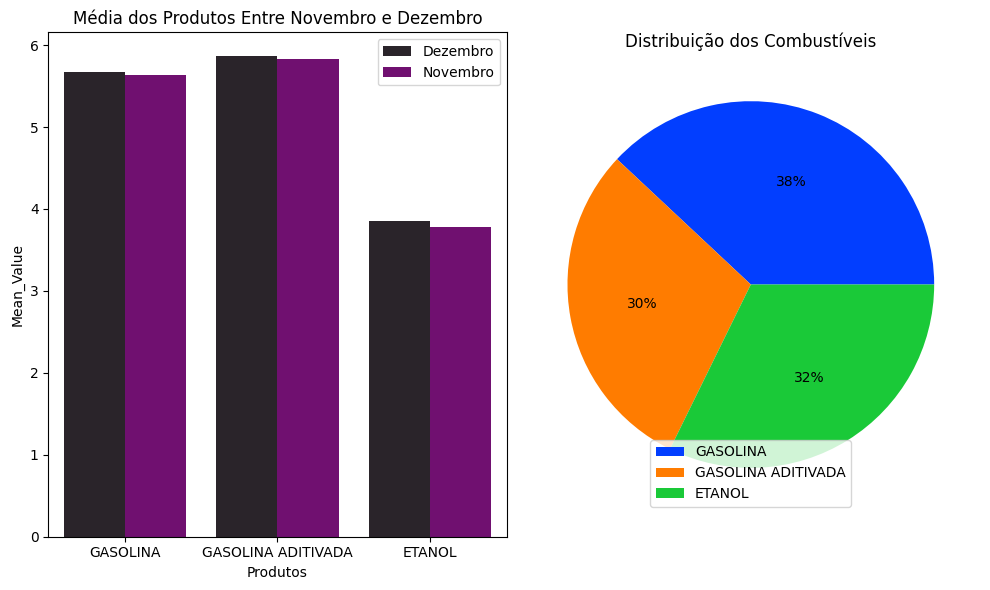

In [ ]:
# Criar um DataFrame para os valores médios e contagens de cada produto em novembro
data_nov = pd.DataFrame({"Produto": product, "Valor Médio": '', "Mês": "Novembro"})

# Calcular os valores médios para cada produto em novembro
data_nov['Valor Médio'] = [operation_df(df_nov, 'Produto', 'mean', p, 'Valor de Venda') for p in product]

# Calcular o valor médio global para todos os combustíveis em novembro
data_nov['Valor Médio de Todos'] = operation_df(df_nov, 'Valor de Venda', 'mean')

# Criar um DataFrame para os valores médios e contagens de cada produto em dezembro
data_dez = pd.DataFrame({"Produto": product, "Valor Médio": '', "Mês": "Dezembro"})

# Calcular os valores médios para cada produto em dezembro
data_dez['Valor Médio'] = [operation_df(df_dez, 'Produto', 'mean', p, 'Valor de Venda') for p in product]

# Calcular as contagens para cada produto em novembro e dezembro
data_nov['Quantidade'] = [operation_df(df_nov, 'Produto', 'count', p, 'Valor de Venda') for p in product]
data_dez['Quantidade'] = [operation_df(df_dez, 'Produto', 'count', p, 'Valor de Venda') for p in product]

# Mesclar os dados de novembro e dezembro para análises adicionais
data_merged = pd.merge(data_nov.drop(columns=['Mês']), data_dez.drop(columns=['Mês']), on='Produto', how='inner')
data_merged = data_merged.drop(data_merged[data_merged['Produto']==product[1]].index)

data_nov = data_nov.drop(data_nov[data_nov['Produto']==product[1]].index)
data_dez = data_dez.drop(data_dez[data_dez['Produto']==product[1]].index)

# **3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?** #

<ipython-input-21-6f7019cdbaf2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_all, palette='bright', ax=axes[1])
<ipython-input-21-6f7019cdbaf2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_per_product[df_per_product['Produto']==product[0]].head(5), palette='bright', ax=axes[0])
<ipython-input-21-6f7019cdbaf2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_per_product[df_per_product['Prod

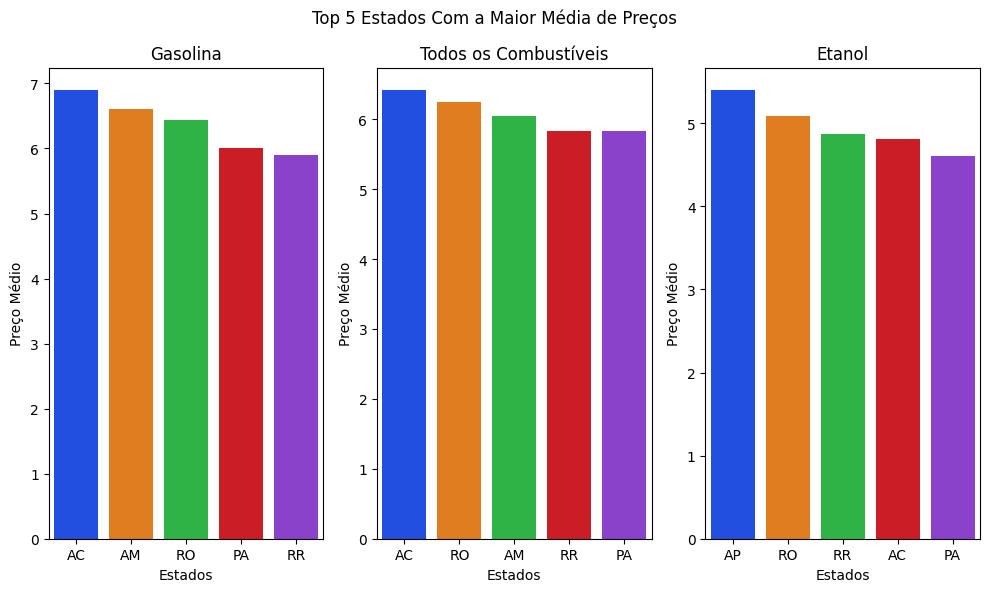

In [ ]:

# Concatenate dataframes for November and December
df = pd.concat([df_nov, df_dez], axis=0, ignore_index=True)

# Ensure 'Estado - Sigla' column is treated as a string
df['Estado - Sigla'] = df['Estado - Sigla'].astype(str)

# Group by state and product, calculate mean price, and sort values in descending order
df_per_product = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
df_per_product = df_per_product.sort_values('Valor de Venda', ascending=False)

# Group by state, calculate mean price, and select the top 5 states with the highest average prices
df_all = df.groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()
df_all = df_all.sort_values('Valor de Venda', ascending=False).head(5).reset_index(drop=True)

# Create a subplot with three plots side by side
fig, axes = plt.subplots(1,3, figsize=(10,6))

# Plot bar chart for the top 5 states with the highest average prices for all fuels
sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_all, palette='bright', ax=axes[1])
axes[1].set_title('Todos os Combustíveis')
axes[1].set_xlabel('Estados')
axes[1].set_ylabel('Preço Médio')

# Plot bar chart for the top 5 states with the highest average prices for Gasolina (Gasoline)
sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_per_product[df_per_product['Produto']==product[0]].head(5), palette='bright', ax=axes[0])
axes[0].set_title('Gasolina')
axes[0].set_xlabel('Estados')
axes[0].set_ylabel('Preço Médio')

# Plot bar chart for the top 5 states with the highest average prices for Etanol (Ethanol)
sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=df_per_product[df_per_product['Produto']==product[2]].head(5), palette='bright', ax=axes[2])
axes[2].set_title('Etanol')
axes[2].set_xlabel('Estados')
axes[2].set_ylabel('Preço Médio')

# Set the overall title for the entire plot
plt.suptitle('Top 5 Estados Com a Maior Média de Preços')
plt.tight_layout()
plt.show()

# **4. Qual o preço médio da gasolina e do etanol por estado?** #

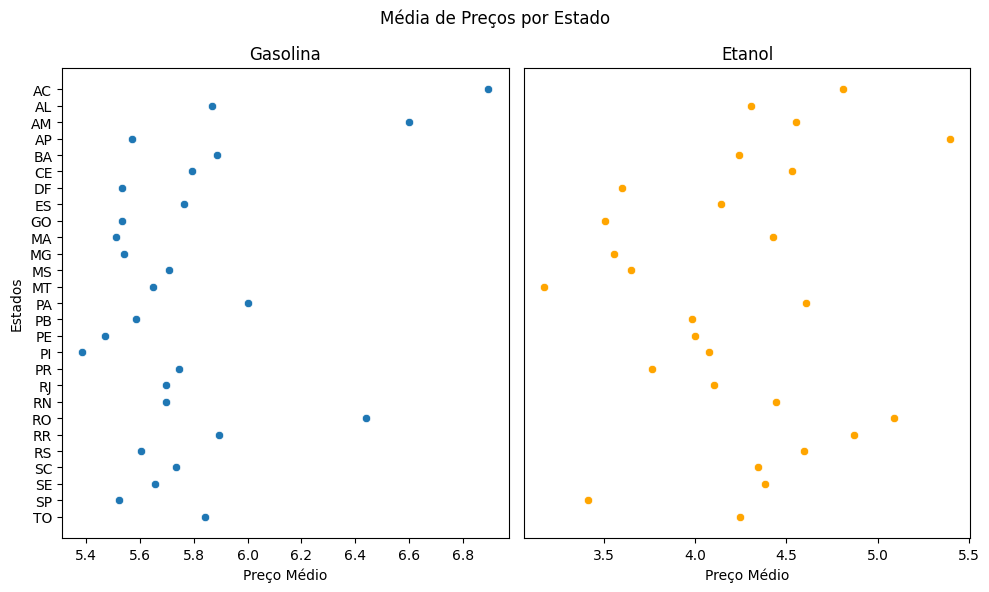

In [ ]:
# Group by state and product, calculate mean price
df_data = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()

# Create a subplot with two scatter plots side by side
fig, axes = plt.subplots(1,2, figsize=(10,6))

# Plot a scatter plot for the average prices of Gasolina (Gasoline) in each state
sns.scatterplot(y='Estado - Sigla', x='Valor de Venda', data=df_data[df_data['Produto']==product[0]], ax=axes[0])
axes[0].set_title('Gasolina')
axes[0].set_xlabel('Preço Médio')
axes[0].set_ylabel('Estados')

# Plot a scatter plot for the average prices of Etanol (Ethanol) in each state
sns.scatterplot(y='Estado - Sigla', x='Valor de Venda', data=df_data[df_data['Produto']==product[2]], color='orange', ax=axes[1])
axes[1].set_title('Etanol')
axes[1].set_xlabel('Preço Médio')
axes[1].set_ylabel('')  # Clearing the default y-axis label
axes[1].set_yticks([])  # Removing y-axis ticks

# Set the overall title for the entire plot
plt.suptitle('Média de Preços por Estado')
plt.tight_layout()
plt.show()

# **5. Qual o município que possui o menor preço para a gasolina e para o etanol?** #

In [ ]:
# Create DataFrames for the municipalities with the lowest Gasolina (Gasoline) and Etanol (Ethanol) prices in November
lowest_gasolina_nov_df = df_nov[df_nov['Produto']==product[0]].nsmallest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]
lowest_etanol_nov_df = df_nov[df_nov['Produto']==product[2]].nsmallest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]

# Create DataFrames for the municipalities with the lowest Gasolina (Gasoline) and Etanol (Ethanol) prices in December
lowest_gasolina_dez_df = df_dez[df_dez['Produto']==product[0]].nsmallest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]
lowest_etanol_dez_df = df_dez[df_dez['Produto']==product[2]].nsmallest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]

# Display the DataFrames
display(lowest_gasolina_nov_df)
display(lowest_gasolina_dez_df)
display(lowest_etanol_nov_df)
display(lowest_etanol_dez_df)


,Estado - Sigla,Municipio,Valor de Venda
1390,SP,BAURU,4.55


,Estado - Sigla,Municipio,Valor de Venda
33870,SP,SAO CARLOS,4.49


,Estado - Sigla,Municipio,Valor de Venda
33960,SP,SAO PAULO,2.69


,Estado - Sigla,Municipio,Valor de Venda
453,SP,DIADEMA,2.78


# **6. Qual o município que possui o maior preço para a gasolina e para o etanol?** #

In [ ]:
# Create DataFrames for the municipalities with the highest Gasolina (Gasoline) and Etanol (Ethanol) prices in November
highest_gasolina_nov_df = df_nov[df_nov['Produto']==product[0]].nlargest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]
highest_etanol_nov_df = df_nov[df_nov['Produto']==product[2]].nlargest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]

# Create DataFrames for the municipalities with the highest Gasolina (Gasoline) and Etanol (Ethanol) prices in December
highest_gasolina_dez_df = df_dez[df_dez['Produto']==product[0]].nlargest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]
highest_etanol_dez_df = df_dez[df_dez['Produto']==product[2]].nlargest(1, 'Valor de Venda')[['Estado - Sigla', 'Municipio', 'Valor de Venda']]

# Display the DataFrames
display(highest_gasolina_nov_df)
display(highest_gasolina_dez_df)
display(highest_etanol_nov_df)
display(highest_etanol_dez_df)


,Estado - Sigla,Municipio,Valor de Venda
2190,AM,TEFE,7.7


,Estado - Sigla,Municipio,Valor de Venda
14238,AM,TEFE,7.7


,Estado - Sigla,Municipio,Valor de Venda
2395,PA,SANTAREM,6.6


,Estado - Sigla,Municipio,Valor de Venda
8621,PA,SANTAREM,6.6


# **7. Qual a região que possui o maior valor médio da gasolina?** #

In [ ]:
# Group by region and product, calculate mean price for Gasolina (Gasoline) in November
data_regiao_nov = df_nov.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
highest_gasolina_regiao_nov_df = data_regiao_nov[data_regiao_nov['Produto']==product[0]].nlargest(1,'Valor de Venda')[['Regiao - Sigla', 'Valor de Venda']]

# Group by region and product, calculate mean price for Gasolina (Gasoline) in December
data_regiao_dez = df_dez.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
highest_gasolina_regiao_dez_df = data_regiao_dez[data_regiao_dez['Produto']==product[0]].nlargest(1,'Valor de Venda')[['Regiao - Sigla', 'Valor de Venda']]

# Display the DataFrames
display(highest_gasolina_regiao_nov_df)
display(highest_gasolina_regiao_dez_df)


,Regiao - Sigla,Valor de Venda
4,N,6.124027


,Regiao - Sigla,Valor de Venda
4,N,6.220625


# **8. Qual a região que possui o menor valor médio do etanol?** #

In [ ]:
# Group by region and product, calculate mean price for Etanol (Ethanol) in November
data_regiao_nov = df_nov.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
lowest_etanol_regiao_nov_df = data_regiao_nov[data_regiao_nov['Produto']==product[2]].nsmallest(1,'Valor de Venda')[['Regiao - Sigla', 'Valor de Venda']]

# Group by region and product, calculate mean price for Etanol (Ethanol) in December
data_regiao_dez = df_dez.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
lowest_etanol_regiao_dez_df = data_regiao_dez[data_regiao_dez['Produto']==product[2]].nsmallest(1,'Valor de Venda')[['Regiao - Sigla', 'Valor de Venda']]

# Display the DataFrames
display(lowest_etanol_regiao_nov_df)
display(lowest_etanol_regiao_dez_df)


,Regiao - Sigla,Valor de Venda
0,CO,3.436548


,Regiao - Sigla,Valor de Venda
0,CO,3.520415


# **9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?** #

In [ ]:
questao9 = df.groupby(['Regiao - Sigla','Data da Coleta', 'Produto'])['Valor de Venda'].mean()

questao9 = pd.DataFrame(questao9)

questao9 = questao9['Valor de Venda'].unstack()
questao9E = pd.DataFrame(questao9['ETANOL'].unstack())
questao9G = pd.DataFrame(questao9['GASOLINA'].unstack())


Gasolina

In [ ]:
questao9G.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.036362,0.140010,0.028372,0.079017
N,-0.036362,1.000000,0.111447,0.215033,0.162177
NE,0.140010,0.111447,1.000000,0.092184,-0.440259
S,0.028372,0.215033,0.092184,1.000000,-0.071477
SE,0.079017,0.162177,-0.440259,-0.071477,1.000000


Etanol

In [ ]:
questao9E.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.074046,0.292111,-0.005159,0.105346
N,-0.074046,1.000000,0.077338,-0.195396,0.104482
NE,0.292111,0.077338,1.000000,-0.143012,0.116131
S,-0.005159,-0.195396,-0.143012,1.000000,0.341813
SE,0.105346,0.104482,0.116131,0.341813,1.000000


 # **10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?** #

In [ ]:
questao10 = df.groupby(['Regiao - Sigla','Data da Coleta','Bandeira','Produto'])['Valor de Venda'].mean()
questao10 = pd.DataFrame(questao10)

questao10 = questao10['Valor de Venda'].unstack()

# Etanol #

## Região Centro - Oeste ##

In [ ]:
questao10co = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['ETANOL']['CO']).dropna().unstack().fillna(0)

questao10co.corr()

CO                                          \
Bandeira                  ALESAT    BRANCA  IPIRANGA MASUT DISTRIBUIDORA   
   Bandeira                                                                
CO ALESAT               1.000000  0.269573  0.331106            0.549866   
   BRANCA               0.269573  1.000000 -0.094992            0.186058   
   IPIRANGA             0.331106 -0.094992  1.000000            0.265864   
   MASUT DISTRIBUIDORA  0.549866  0.186058  0.265864            1.000000   
   RAIZEN               0.612792  0.432829  0.342642            0.483174   
   VIBRA                0.393832  0.206934  0.769227            0.328271   
   CIAPETRO             0.342958  0.132254  0.166480            0.439683   
   SIMARELLI            0.209598  0.079180  0.143432            0.123453   
   TAURUS               0.285326  0.257060  0.396782            0.261343   
   RIO BRANCO           0.135788  0.052150  0.083739            0.110555   
   RODOIL               0.100096  0.033405  0.064691            0.043722   
   TOTALENERGIES        0.246556  0.049687  0.077741            0.250559   
   ROYAL FIC           -0.168491  0.048667  0.044518           -0.139849   

                                                                          \
Bandeira                  RAIZEN     VIBRA  CIAPETRO SIMARELLI    TAURUS   
   Bandeira                                                                
CO ALESAT               0.612792  0.393832  0.342958  0.209598  0.285326   
   BRANCA               0.432829  0.206934  0.132254  0.079180  0.257060   
   IPIRANGA             0.342642  0.769227  0.166480  0.143432  0.396782   
   MASUT DISTRIBUIDORA  0.483174  0.328271  0.439683  0.123453  0.261343   
   RAIZEN               1.000000  0.508424  0.320022  0.227276  0.682619   
   VIBRA                0.508424  1.000000  0.217957  0.132709  0.481683   
   CIAPETRO             0.320022  0.217957  1.000000 -0.020488  0.335904   
   SIMARELLI            0.227276  0.132709 -0.020488  1.000000  0.317054   
   TAURUS               0.682619  0.481683  0.335904  0.317054  1.000000   
   RIO BRANCO           0.199502  0.117405 -0.032304  0.113426  0.068475   
   RODOIL               0.165191  0.087128  0.014887  0.128403  0.201328   
   TOTALENERGIES        0.132686  0.089941  0.214234  0.267736  0.232865   
   ROYAL FIC            0.057371  0.095605 -0.077178 -0.058923  0.141859   

                                                                     
Bandeira               RIO BRANCO    RODOIL TOTALENERGIES ROYAL FIC  
   Bandeira                                                          
CO ALESAT                0.135788  0.100096      0.246556 -0.168491  
   BRANCA                0.052150  0.033405      0.049687  0.048667  
   IPIRANGA              0.083739  0.064691      0.077741  0.044518  
   MASUT DISTRIBUIDORA   0.110555  0.043722      0.250559 -0.139849  
   RAIZEN                0.199502  0.165191      0.132686  0.057371  
   VIBRA                 0.117405  0.087128      0.089941  0.095605  
   CIAPETRO             -0.032304  0.014887      0.214234 -0.077178  
   SIMARELLI             0.113426  0.128403      0.267736 -0.058923  
   TAURUS                0.068475  0.201328      0.232865  0.141859  
   RIO BRANCO            1.000000  0.848421     -0.083938 -0.058606  
   RODOIL                0.848421  1.000000     -0.074455 -0.051985  
   TOTALENERGIES        -0.083938 -0.074455      1.000000 -0.035806  
   ROYAL FIC            -0.058606 -0.051985     -0.035806  1.000000

## Região Nordeste##

In [ ]:
questao10ne = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['ETANOL']['NE']).dropna().unstack().fillna(0)

questao10ne.corr()

NE                                           \
Bandeira                   ALESAT    BRANCA  IPIRANGA PETROBAHIA    RAIZEN   
   Bandeira                                                                  
NE ALESAT                1.000000  0.350721  0.682527   0.168545  0.674437   
   BRANCA                0.350721  1.000000  0.295254   0.323006  0.304458   
   IPIRANGA              0.682527  0.295254  1.000000   0.305515  0.991123   
   PETROBAHIA            0.168545  0.323006  0.305515   1.000000  0.336111   
   RAIZEN                0.674437  0.304458  0.991123   0.336111  1.000000   
   SETTA DISTRIBUIDORA   0.144795 -0.025318  0.164937   0.134632  0.112027   
   SP                    0.304052  0.324111  0.410289   0.391774  0.421343   
   VIBRA                 0.677579  0.277344  0.992476   0.282347  0.992547   
   LARCO                 0.137675  0.112231  0.162806   0.246640  0.176418   
   SABBÁ                -0.143065 -0.015521  0.104937   0.134830  0.089927   
   DISLUB                0.156137  0.211077  0.240822   0.224129  0.208491   
   FAN                   0.113094  0.113661  0.233083   0.213866  0.202617   
   FEDERAL ENERGIA       0.117320  0.070852  0.193026   0.122290  0.183003   
   PETROX DISTRIBUIDORA  0.145880  0.282450  0.250150   0.082831  0.205697   
   TDC DISTRIBUIDORA     0.137845  0.271598  0.186509  -0.012951  0.161827   
   TEMAPE                0.067502 -0.040915  0.127716  -0.141566  0.065754   

                                                                           \
Bandeira                SETTA DISTRIBUIDORA        SP     VIBRA     LARCO   
   Bandeira                                                                 
NE ALESAT                          0.144795  0.304052  0.677579  0.137675   
   BRANCA                         -0.025318  0.324111  0.277344  0.112231   
   IPIRANGA                        0.164937  0.410289  0.992476  0.162806   
   PETROBAHIA                      0.134632  0.391774  0.282347  0.246640   
   RAIZEN                          0.112027  0.421343  0.992547  0.176418   
   SETTA DISTRIBUIDORA             1.000000  0.196076  0.143424  0.184040   
   SP                              0.196076  1.000000  0.383097  0.134154   
   VIBRA                           0.143424  0.383097  1.000000  0.160477   
   LARCO                           0.184040  0.134154  0.160477  1.000000   
   SABBÁ                          -0.009876  0.148474  0.044729 -0.081007   
   DISLUB                          0.552980  0.119147  0.221833  0.279254   
   FAN                             0.194712  0.101301  0.196776 -0.070419   
   FEDERAL ENERGIA                 0.243537  0.154399  0.186157  0.156125   
   PETROX DISTRIBUIDORA            0.259235  0.115184  0.192525  0.099996   
   TDC DISTRIBUIDORA               0.268630 -0.015911  0.157457  0.183484   
   TEMAPE                          0.292878 -0.112386  0.076079 -0.123568   

                                                                       \
Bandeira                    SABBÁ    DISLUB       FAN FEDERAL ENERGIA   
   Bandeira                                                             
NE ALESAT               -0.143065  0.156137  0.113094        0.117320   
   BRANCA               -0.015521  0.211077  0.113661        0.070852   
   IPIRANGA              0.104937  0.240822  0.233083        0.193026   
   PETROBAHIA            0.134830  0.224129  0.213866        0.122290   
   RAIZEN                0.089927  0.208491  0.202617        0.183003   
   SETTA DISTRIBUIDORA  -0.009876  0.552980  0.194712        0.243537   
   SP                    0.148474  0.119147  0.101301        0.154399   
   VIBRA                 0.044729  0.221833  0.196776        0.186157   
   LARCO                -0.081007  0.279254 -0.070419        0.156125   
   SABBÁ                 1.000000  0.209673  0.297639        0.290619   
   DISLUB                0.209673  1.000000  0.410986        0.325916   
   FAN                   0.297639  0.410986  1.000000        0

## Região Norte ##

In [ ]:
questao10n = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['ETANOL']['N']).dropna().unstack().fillna(0)

questao10n.corr()

N                                          \
Bandeira              ATEM' S    BRANCA  IPIRANGA    RAIZEN     SABBÁ   
  Bandeira                                                              
N ATEM' S            1.000000  0.056252  0.424482  0.481187  0.563505   
  BRANCA             0.056252  1.000000  0.288134 -0.058798  0.157849   
  IPIRANGA           0.424482  0.288134  1.000000  0.140373  0.435759   
  RAIZEN             0.481187 -0.058798  0.140373  1.000000  0.107103   
  SABBÁ              0.563505  0.157849  0.435759  0.107103  1.000000   
  VIBRA              0.304730 -0.111244  0.683544  0.094931  0.193158   
  ALESAT             0.383643 -0.094316  0.210258  0.189382  0.441980   
  EQUADOR            0.233497 -0.012239  0.294733  0.305435  0.106020   
  RZD DISTRIBUIDORA  0.468717 -0.087845  0.161465  0.246611  0.401744   

                                                                     
Bandeira                VIBRA    ALESAT   EQUADOR RZD DISTRIBUIDORA  
  Bandeira                                                           
N ATEM' S            0.304730  0.383643  0.233497          0.468717  
  BRANCA            -0.111244 -0.094316 -0.012239         -0.087845  
  IPIRANGA           0.683544  0.210258  0.294733          0.161465  
  RAIZEN             0.094931  0.189382  0.305435          0.246611  
  SABBÁ              0.193158  0.441980  0.106020          0.401744  
  VIBRA              1.000000  0.150176  0.189327          0.130527  
  ALESAT             0.150176  1.000000 -0.164281          0.238831  
  EQUADOR            0.189327 -0.164281  1.000000          0.196272  
  RZD DISTRIBUIDORA  0.130527  0.238831  0.196272          1.000000

## Região Sudeste ##

In [ ]:
questao10se = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['ETANOL']['SE']).dropna().unstack().fillna(0)

questao10se.corr()

SE                                          \
Bandeira            ALESAT    BRANCA  IPIRANGA    RAIZEN    RODOIL   
   Bandeira                                                          
SE ALESAT         1.000000  0.539008  0.656328  0.577972  0.176928   
   BRANCA         0.539008  1.000000  0.262312  0.215000  0.149772   
   IPIRANGA       0.656328  0.262312  1.000000  0.968463  0.113127   
   RAIZEN         0.577972  0.215000  0.968463  1.000000  0.096894   
   RODOIL         0.176928  0.149772  0.113127  0.096894  1.000000   
   TOTALENERGIES  0.350100  0.199779  0.210760  0.189457  0.359660   
   VIBRA          0.534360  0.186564  0.969983  0.981251  0.090920   
   CIAPETRO       0.146392  0.257053  0.107873  0.088192  0.268712   
   ATLÂNTICA      0.178148  0.013057  0.101804  0.063825  0.258549   
   TAURUS         0.129601  0.100716  0.059934  0.051597  0.331452   
   D`MAIS         0.136012  0.183368  0.110069  0.106151  0.063120   
   RIO BRANCO     0.165566  0.204210  0.109280  0.103395 -0.156121   

                                                                        \
Bandeira         TOTALENERGIES     VIBRA  CIAPETRO ATLÂNTICA    TAURUS   
   Bandeira                                                              
SE ALESAT             0.350100  0.534360  0.146392  0.178148  0.129601   
   BRANCA             0.199779  0.186564  0.257053  0.013057  0.100716   
   IPIRANGA           0.210760  0.969983  0.107873  0.101804  0.059934   
   RAIZEN             0.189457  0.981251  0.088192  0.063825  0.051597   
   RODOIL             0.359660  0.090920  0.268712  0.258549  0.331452   
   TOTALENERGIES      1.000000  0.178007  0.211608  0.212180  0.323272   
   VIBRA              0.178007  1.000000  0.079849  0.064093  0.060898   
   CIAPETRO           0.211608  0.079849  1.000000  0.238719  0.041924   
   ATLÂNTICA          0.212180  0.064093  0.238719  1.000000  0.261964   
   TAURUS             0.323272  0.060898  0.041924  0.261964  1.000000   
   D`MAIS             0.352022  0.081426  0.052853 -0.108363 -0.069957   
   RIO BRANCO         0.334820  0.115962  0.085857 -0.097549 -0.140430   

                                       
Bandeira            D`MAIS RIO BRANCO  
   Bandeira                            
SE ALESAT         0.136012   0.165566  
   BRANCA         0.183368   0.204210  
   IPIRANGA       0.110069   0.109280  
   RAIZEN         0.106151   0.103395  
   RODOIL         0.063120  -0.156121  
   TOTALENERGIES  0.352022   0.334820  
   VIBRA          0.081426   0.115962  
   CIAPETRO       0.052853   0.085857  
   ATLÂNTICA     -0.108363  -0.097549  
   TAURUS        -0.069957  -0.140430  
   D`MAIS         1.000000   0.431380  
   RIO BRANCO     0.431380   1.000000

## Região Sul ##

In [ ]:
questao10s = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['ETANOL']['S']).dropna().unstack().fillna(0)

questao10s.corr()

S                                                    \
Bandeira         ALESAT    BRANCA   CHARRUA  IPIRANGA    MAXSUL  ON PETRO   
  Bandeira                                                                  
S ALESAT       1.000000  0.224708  0.340554  0.292775  0.269702  0.349441   
  BRANCA       0.224708  1.000000  0.109877  0.961787  0.105477  0.062961   
  CHARRUA      0.340554  0.109877  1.000000  0.188688  0.400029  0.460209   
  IPIRANGA     0.292775  0.961787  0.188688  1.000000  0.128135  0.145801   
  MAXSUL       0.269702  0.105477  0.400029  0.128135  1.000000  0.322665   
  ON PETRO     0.349441  0.062961  0.460209  0.145801  0.322665  1.000000   
  PELIKANO     0.124756  0.050563  0.364082  0.072540 -0.123477  0.090361   
  RAIZEN       0.360512 -0.097810  0.201280  0.015298  0.167338  0.100781   
  RAIZEN MIME  0.124333  0.238879  0.448782  0.285343  0.380599  0.227352   
  RODOIL       0.300147  0.182896  0.425816  0.226780  0.257015  0.252251   
  STANG        0.330480  0.353514  0.277203  0.374886  0.155765  0.101764   
  VIBRA        0.326858 -0.048617  0.233188  0.079219  0.167669  0.108123   
  POTENCIAL    0.211957  0.118345  0.135882  0.122353  0.333775  0.228882   
  CIAPETRO     0.389090  0.116628  0.292948  0.170696  0.054376  0.208098   
  ESTRADA     -0.254683  0.006728 -0.176419 -0.041126 -0.070577 -0.186622   
  UNI          0.185923  0.038980 -0.064267  0.036019  0.093922  0.191880   
  WALENDOWSKY  0.270666  0.051887  0.114547  0.056966  0.431156 -0.080330   
  IDAZA        0.156071  0.005859  0.018356  0.009482  0.128467  0.426572   

                                                                             \
Bandeira       PELIKANO    RAIZEN RAIZEN MIME    RODOIL     STANG     VIBRA   
  Bandeira                                                                    
S ALESAT       0.124756  0.360512    0.124333  0.300147  0.330480  0.326858   
  BRANCA       0.050563 -0.097810    0.238879  0.182896  0.353514 -0.048617   
  CHARRUA      0.364082  0.201280    0.448782  0.425816  0.277203  0.233188   
  IPIRANGA     0.072540  0.015298    0.285343  0.226780  0.374886  0.079219   
  MAXSUL      -0.123477  0.167338    0.380599  0.257015  0.155765  0.167669   
  ON PETRO     0.090361  0.100781    0.227352  0.252251  0.101764  0.108123   
  PELIKANO     1.000000  0.093007    0.161347  0.124906 -0.000347  0.102804   
  RAIZEN       0.093007  1.000000    0.136357  0.359825  0.189266  0.457395   
  RAIZEN MIME  0.161347  0.136357    1.000000  0.239912  0.307357  0.137713   
  RODOIL       0.124906  0.359825    0.239912  1.000000  0.162929  0.186463   
  STANG       -0.000347  0.189266    0.307357  0.162929  1.000000  0.197992   
  VIBRA        0.102804  0.457395    0.137713  0.186463  0.197992  1.000000   
  POTENCIAL   -0.239796  0.227909    0.280258  0.435534 -0.045233 -0.023950   
  CIAPETRO     0.207315  0.186289    0.262927  0.256140  0.035825  0.180508   
  ESTRADA      0.034417  0.005655    0.073973 -0.031491  0.190776  0.077946   
  UNI         -0.210735  0.062811    0.185403  0.205903  0.261734  0.072821   
  WALENDOWSKY -0.194325  0.101490    0.315868  0.312307  0.174376  0.086950   
  IDAZA       -0.097300  0.013850    0.138845  0.106056  0.095106  0.016902   

                                                                             
Bandeira      POTENCIAL  CIAPETRO   ESTRADA       UNI WALENDOWSKY     IDAZA  
  Bandeira                                                                   
S ALESAT       0.211957  0.389090 -0.254683  0.185923    0.270666  0.156071  
  BRANCA       0.118345  0.116628  0.006728  0.038980    0.051887  0.005859  
  CHARRUA      0.135882  0.292948 -0.176419 -0.064267    0.114547  0.018356  
  IPIRANGA     0.122353  0.170696 -0.041126  0.036019    0.056966  0.009482  
  MAXSUL       0.333775  0.054376 -0.070577  0.093922    0.431156  0.128467  
  ON PETRO     0.228882  0.208098 -0.186622  0.191880   -0.080330  0.426572  
  PELIKANO    -0.239796  0.207315  0.03441

# Gasolina #

## Região Centro - Oeste ##

In [ ]:
questao10co = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['GASOLINA']['CO']).dropna().unstack().fillna(0)

questao10co.corr()

CO                                          \
Bandeira                  ALESAT    BRANCA  IPIRANGA MASUT DISTRIBUIDORA   
   Bandeira                                                                
CO ALESAT               1.000000  0.248499  0.295719            0.540405   
   BRANCA               0.248499  1.000000 -0.123544            0.190298   
   IPIRANGA             0.295719 -0.123544  1.000000            0.232890   
   MASUT DISTRIBUIDORA  0.540405  0.190298  0.232890            1.000000   
   RAIZEN               0.515011  0.454567  0.315621            0.420790   
   VIBRA                0.368673  0.187344  0.735498            0.297907   
   CIAPETRO             0.341902  0.108001  0.128532            0.437609   
   SIMARELLI            0.207548  0.085570  0.112556            0.125360   
   TAURUS               0.288873  0.283334  0.345651            0.262793   
   RIO BRANCO           0.163019  0.068959  0.071428            0.113996   
   RODOIL               0.118364  0.053193  0.054666            0.046033   
   TOTALENERGIES        0.236275  0.063592  0.074114            0.256719   
   ROYAL FIC           -0.169492  0.031233  0.027592           -0.139854   

                                                                          \
Bandeira                  RAIZEN     VIBRA  CIAPETRO SIMARELLI    TAURUS   
   Bandeira                                                                
CO ALESAT               0.515011  0.368673  0.341902  0.207548  0.288873   
   BRANCA               0.454567  0.187344  0.108001  0.085570  0.283334   
   IPIRANGA             0.315621  0.735498  0.128532  0.112556  0.345651   
   MASUT DISTRIBUIDORA  0.420790  0.297907  0.437609  0.125360  0.262793   
   RAIZEN               1.000000  0.540797  0.248007  0.191134  0.643317   
   VIBRA                0.540797  1.000000  0.179557  0.137625  0.482007   
   CIAPETRO             0.248007  0.179557  1.000000 -0.012646  0.336298   
   SIMARELLI            0.191134  0.137625 -0.012646  1.000000  0.302821   
   TAURUS               0.643317  0.482007  0.336298  0.302821  1.000000   
   RIO BRANCO           0.166132  0.100869 -0.024725  0.096200  0.083487   
   RODOIL               0.141367  0.083547  0.027796  0.126770  0.206176   
   TOTALENERGIES        0.120770  0.106040  0.200039  0.271930  0.220517   
   ROYAL FIC            0.082446  0.065111 -0.077579 -0.058918  0.127894   

                                                                     
Bandeira               RIO BRANCO    RODOIL TOTALENERGIES ROYAL FIC  
   Bandeira                                                          
CO ALESAT                0.163019  0.118364      0.236275 -0.169492  
   BRANCA                0.068959  0.053193      0.063592  0.031233  
   IPIRANGA              0.071428  0.054666      0.074114  0.027592  
   MASUT DISTRIBUIDORA   0.113996  0.046033      0.256719 -0.139854  
   RAIZEN                0.166132  0.141367      0.120770  0.082446  
   VIBRA                 0.100869  0.083547      0.106040  0.065111  
   CIAPETRO             -0.024725  0.027796      0.200039 -0.077579  
   SIMARELLI             0.096200  0.126770      0.271930 -0.058918  
   TAURUS                0.083487  0.206176      0.220517  0.127894  
   RIO BRANCO            1.000000  0.871054     -0.084294 -0.058855  
   RODOIL                0.871054  1.000000     -0.074458 -0.051988  
   TOTALENERGIES        -0.084294 -0.074458      1.000000 -0.035806  
   ROYAL FIC            -0.058855 -0.051988     -0.035806  1.000000

## Região Nordeste##

In [ ]:
questao10ne = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['GASOLINA']['NE']).dropna().unstack().fillna(0)

questao10ne.corr()

NE                                          \
Bandeira                   ALESAT    BRANCA    DISLUB       FAN  IPIRANGA   
   Bandeira                                                                 
NE ALESAT                1.000000  0.243857  0.186506  0.123651  0.680769   
   BRANCA                0.243857  1.000000  0.401460  0.253258  0.098628   
   DISLUB                0.186506  0.401460  1.000000  0.502842  0.325274   
   FAN                   0.123651  0.253258  0.502842  1.000000  0.237297   
   IPIRANGA              0.680769  0.098628  0.325274  0.237297  1.000000   
   PETROBAHIA            0.183291  0.410293  0.388295  0.246193  0.335666   
   RAIZEN                0.679149  0.066964  0.284825  0.202540  0.995767   
   SETTA DISTRIBUIDORA   0.161856  0.181552  0.487678  0.413359  0.149836   
   SP                    0.371415  0.342975  0.427247  0.284586  0.584546   
   VIBRA                 0.681334  0.063509  0.292508  0.212973  0.995052   
   LARCO                 0.133344  0.170686  0.211371 -0.183923  0.173426   
   SABBÁ                -0.156662  0.041895  0.230303  0.262892  0.134930   
   FEDERAL ENERGIA       0.065354  0.067192  0.391632  0.261843  0.185374   
   PETROX DISTRIBUIDORA  0.105725  0.242044  0.557234  0.371500  0.220931   
   TDC DISTRIBUIDORA     0.147534  0.391104  0.414645  0.311707  0.174175   
   TEMAPE                0.104443  0.142878  0.505881  0.337029  0.186227   

                                                                            \
Bandeira                PETROBAHIA    RAIZEN SETTA DISTRIBUIDORA        SP   
   Bandeira                                                                  
NE ALESAT                 0.183291  0.679149            0.161856  0.371415   
   BRANCA                 0.410293  0.066964            0.181552  0.342975   
   DISLUB                 0.388295  0.284825            0.487678  0.427247   
   FAN                    0.246193  0.202540            0.413359  0.284586   
   IPIRANGA               0.335666  0.995767            0.149836  0.584546   
   PETROBAHIA             1.000000  0.339925            0.191841  0.449984   
   RAIZEN                 0.339925  1.000000            0.117499  0.561777   
   SETTA DISTRIBUIDORA    0.191841  0.117499            1.000000  0.151057   
   SP                     0.449984  0.561777            0.151057  1.000000   
   VIBRA                  0.313844  0.996598            0.140027  0.540559   
   LARCO                  0.267260  0.173543            0.048943  0.169863   
   SABBÁ                  0.137349  0.118874           -0.051576  0.351130   
   FEDERAL ENERGIA        0.188377  0.175014            0.242677  0.318190   
   PETROX DISTRIBUIDORA   0.148810  0.178710            0.265118  0.379015   
   TDC DISTRIBUIDORA      0.061044  0.152343            0.265823  0.308757   
   TEMAPE                 0.219670  0.167287            0.330415  0.332462   

                                                                       \
Bandeira                    VIBRA     LARCO     SABBÁ FEDERAL ENERGIA   
   Bandeira                                                             
NE ALESAT                0.681334  0.133344 -0.156662        0.065354   
   BRANCA                0.063509  0.170686  0.041895        0.067192   
   DISLUB                0.292508  0.211371  0.230303        0.391632   
   FAN                   0.212973 -0.183923  0.262892        0.261843   
   IPIRANGA              0.995052  0.173426  0.134930        0.185374   
   PETROBAHIA            0.313844  0.267260  0.137349        0.188377   
   RAIZEN                0.996598  0.173543  0.118874        0.175014   
   SETTA DISTRIBUIDORA   0.140027  0.048943 -0.051576        0.242677   
   SP                    0.540559  0.169863  0.351130        0.318190   
   VIBRA                 1.000000  0.161310  0.083772        0.179058   
   LARCO                 0.161310  1.000000 -0.068840        0.040062   
   SABBÁ                 0.083772 -0.068840  1.000000        0

## Região Norte ##

In [ ]:
questao10n = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['GASOLINA']['N']).dropna().unstack().fillna(0)

questao10n.corr()

N                                          \
Bandeira              ATEM' S    BRANCA  IPIRANGA    RAIZEN     SABBÁ   
  Bandeira                                                              
N ATEM' S            1.000000  0.218474  0.444157  0.492152  0.241145   
  BRANCA             0.218474  1.000000  0.312800  0.025760 -0.136155   
  IPIRANGA           0.444157  0.312800  1.000000  0.194134  0.419363   
  RAIZEN             0.492152  0.025760  0.194134  1.000000  0.179533   
  SABBÁ              0.241145 -0.136155  0.419363  0.179533  1.000000   
  VIBRA              0.204959  0.415081  0.786831  0.189283  0.316513   
  ALESAT             0.131936 -0.327760  0.146944  0.077856  0.276307   
  EQUADOR            0.597695 -0.068006  0.470020  0.152319  0.437486   
  RZD DISTRIBUIDORA  0.258635 -0.057742  0.198971  0.044181  0.193736   

                                                                     
Bandeira                VIBRA    ALESAT   EQUADOR RZD DISTRIBUIDORA  
  Bandeira                                                           
N ATEM' S            0.204959  0.131936  0.597695          0.258635  
  BRANCA             0.415081 -0.327760 -0.068006         -0.057742  
  IPIRANGA           0.786831  0.146944  0.470020          0.198971  
  RAIZEN             0.189283  0.077856  0.152319          0.044181  
  SABBÁ              0.316513  0.276307  0.437486          0.193736  
  VIBRA              1.000000  0.064454  0.231941          0.174731  
  ALESAT             0.064454  1.000000  0.386560          0.431590  
  EQUADOR            0.231941  0.386560  1.000000          0.278983  
  RZD DISTRIBUIDORA  0.174731  0.431590  0.278983          1.000000

## Região Sudeste ##

In [ ]:
questao10se = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['GASOLINA']['SE']).dropna().unstack().fillna(0)

questao10se.corr()

SE                                                    \
Bandeira            ALESAT ATLÂNTICA    BRANCA  IPIRANGA    RAIZEN    RODOIL   
   Bandeira                                                                    
SE ALESAT         1.000000  0.204968  0.229428  0.557116  0.580769  0.161487   
   ATLÂNTICA      0.204968  1.000000 -0.113887  0.117301  0.102205  0.367734   
   BRANCA         0.229428 -0.113887  1.000000  0.422737  0.422608 -0.026233   
   IPIRANGA       0.557116  0.117301  0.422737  1.000000  0.994833  0.103855   
   RAIZEN         0.580769  0.102205  0.422608  0.994833  1.000000  0.093226   
   RODOIL         0.161487  0.367734 -0.026233  0.103855  0.093226  1.000000   
   TOTALENERGIES  0.353107  0.305024  0.213695  0.219871  0.194617  0.350062   
   VIBRA         -0.124617 -0.520249  0.351326 -0.116803 -0.083596 -0.243160   
   CIAPETRO       0.120912  0.260205  0.164251  0.080265  0.078938  0.279724   
   TAURUS         0.115447  0.188803 -0.015131  0.079470  0.067401  0.336867   
   D`MAIS         0.128441 -0.044079  0.355361  0.090565  0.078166  0.068263   
   RIO BRANCO     0.148730 -0.173919  0.219611  0.094914  0.091144 -0.154812   

                                                                        \
Bandeira         TOTALENERGIES     VIBRA  CIAPETRO    TAURUS    D`MAIS   
   Bandeira                                                              
SE ALESAT             0.353107 -0.124617  0.120912  0.115447  0.128441   
   ATLÂNTICA          0.305024 -0.520249  0.260205  0.188803 -0.044079   
   BRANCA             0.213695  0.351326  0.164251 -0.015131  0.355361   
   IPIRANGA           0.219871 -0.116803  0.080265  0.079470  0.090565   
   RAIZEN             0.194617 -0.083596  0.078938  0.067401  0.078166   
   RODOIL             0.350062 -0.243160  0.279724  0.336867  0.068263   
   TOTALENERGIES      1.000000 -0.398637  0.211281  0.320201  0.357682   
   VIBRA             -0.398637  1.000000 -0.018965 -0.060693 -0.086313   
   CIAPETRO           0.211281 -0.018965  1.000000  0.045699  0.048643   
   TAURUS             0.320201 -0.060693  0.045699  1.000000 -0.074374   
   D`MAIS             0.357682 -0.086313  0.048643 -0.074374  1.000000   
   RIO BRANCO         0.329635 -0.048662  0.084568 -0.141026  0.414947   

                             
Bandeira         RIO BRANCO  
   Bandeira                  
SE ALESAT          0.148730  
   ATLÂNTICA      -0.173919  
   BRANCA          0.219611  
   IPIRANGA        0.094914  
   RAIZEN          0.091144  
   RODOIL         -0.154812  
   TOTALENERGIES   0.329635  
   VIBRA          -0.048662  
   CIAPETRO        0.084568  
   TAURUS         -0.141026  
   D`MAIS          0.414947  
   RIO BRANCO      1.000000

## Região Sul ##

In [ ]:
questao10s = pd.DataFrame(questao10.unstack(level = 'Regiao - Sigla')['GASOLINA']['S']).dropna().unstack().fillna(0)

questao10s.corr()

S                                          \
Bandeira              ALESAT    BRANCA   CHARRUA  IPIRANGA    MAXSUL   
  Bandeira                                                             
S ALESAT            1.000000 -0.083614  0.298683 -0.063055  0.135317   
  BRANCA           -0.083614  1.000000  0.130108  0.996606  0.130281   
  CHARRUA           0.298683  0.130108  1.000000  0.168071  0.669766   
  IPIRANGA         -0.063055  0.996606  0.168071  1.000000  0.159720   
  MAXSUL            0.135317  0.130281  0.669766  0.159720  1.000000   
  ON PETRO          0.188304  0.069069  0.454703  0.075867  0.370478   
  PELIKANO          0.182852  0.055178  0.391810  0.081413  0.266679   
  RAIZEN           -0.083455 -0.059329  0.126907 -0.043014  0.126820   
  RAIZEN MIME       0.309263  0.288872  0.305487  0.294754  0.398150   
  RODOIL            0.034357  0.362719  0.465615  0.379574  0.171816   
  STANG             0.357485  0.323971  0.233507  0.354255  0.337761   
  VIBRA             0.383602 -0.094413  0.164809 -0.080684  0.164390   
  DIBRAPE          -0.136032  0.068378  0.240242  0.074869  0.363993   
  POTENCIAL        -0.194511  0.184703  0.287532  0.176864  0.256571   
  CIAPETRO          0.235674  0.121115  0.559064  0.139504  0.399491   
  ESTRADA          -0.259429  0.054064 -0.261451  0.064558 -0.106589   
  UNI               0.006975  0.066441  0.064448  0.061094  0.203722   
  WALENDOWSKY       0.173084  0.048153  0.275096  0.060180  0.290539   
  SUL COMBUSTÍVEIS  0.042655  0.078607  0.232054  0.099774  0.012638   
  REJAILE           0.121312  0.029242  0.294805  0.040253  0.145909   
  IDAZA             0.083158  0.024977  0.204080  0.018972  0.212152   

                                                                        ...  \
Bandeira            ON PETRO  PELIKANO    RAIZEN RAIZEN MIME    RODOIL  ...   
  Bandeira                                                              ...   
S ALESAT            0.188304  0.182852 -0.083455    0.309263  0.034357  ...   
  BRANCA            0.069069  0.055178 -0.059329    0.288872  0.362719  ...   
  CHARRUA           0.454703  0.391810  0.126907    0.305487  0.465615  ...   
  IPIRANGA          0.075867  0.081413 -0.043014    0.294754  0.379574  ...   
  MAXSUL            0.370478  0.266679  0.126820    0.398150  0.171816  ...   
  ON PETRO          1.000000  0.083128  0.086756    0.249637  0.210741  ...   
  PELIKANO          0.083128  1.000000  0.076537    0.043064  0.203026  ...   
  RAIZEN            0.086756  0.076537  1.000000   -0.085583 -0.083490  ...   
  RAIZEN MIME       0.249637  0.043064 -0.085583    1.000000  0.179196  ...   
  RODOIL            0.210741  0.203026 -0.083490    0.179196  1.000000  ...   
  STANG             0.231973  0.012613 -0.086319    0.442844  0.195350  ...   
  VIBRA             0.070953  0.080840 -0.036569    0.297720 -0.055366  ...   
  DIBRAPE           0.159875 -0.070730  0.044393    0.103023  0.222076  ...   
  POTENCIAL         0.278833 -0.180221  0.136892    0.255967  0.260025  ...   
  CIAPETRO          0.202289  0.219632  0.133885    0.199732  0.111688  ...   
  ESTRADA          -0.186627  0.036082  0.068435   -0.003987 -0.052486  ...   
  UNI               0.191609 -0.210804  0.054900    0.080210  0.196018  ...   
  WALENDOWSKY      -0.072023 -0.194444  0.032576    0.213740  0.182140  ...   
  SUL COMBUSTÍVEIS  0.019466  0.078789  0.063044   -0.045312  0.039794  ...   
  REJAILE           0.032039 -0.141220  0.005995    0.158100  0.127350  ...   
  IDAZA             0.429281 -0.097391  0.028142    0.110522  0.086333  ...   

                                                                      \
Bandeira               VIBRA   DIBRAPE POTENCIAL  CIAPETRO   ESTRADA   
  Bandeira                                                             
S ALESAT            0.383602 -0.136032 -0.194511  0.235674 -0.259429   
  BRANCA           -0.094413  0.068378  0.184703  0.121115  0.054064   
  CHARRUA           0.164809  0.240242  0

# **11. Como variou o preço médio do etanol e da gasolina em comparação com o mês anterior para cada estado?** #

In [ ]:
#NOVEMBRO
q11_nov = df_nov.groupby(['Estado - Sigla',"Produto"])['Valor de Venda'].mean()

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
q11_nov_gasolina = q11_nov[q11_nov.index.get_level_values('Produto') == 'GASOLINA']
q11_nov_gasolina = pd.DataFrame(q11_nov_gasolina)

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
q11_nov_etanol = q11_nov[q11_nov.index.get_level_values('Produto') == 'ETANOL']
q11_nov_etanol = pd.DataFrame(q11_nov_etanol)


In [ ]:
#DEZEMBRO
q11_dez = df_dez.groupby(['Estado - Sigla',"Produto"])['Valor de Venda'].mean()

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
q11_dez_gasolina = q11_dez[q11_dez.index.get_level_values('Produto') == 'GASOLINA']
q11_dez_gasolina = pd.DataFrame(q11_dez_gasolina)

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
q11_dez_etanol = q11_dez[q11_dez.index.get_level_values('Produto') == 'ETANOL']
q11_dez_etanol = pd.DataFrame(q11_dez_etanol)


In [ ]:
# Gasolina
q11_gasolina = pd.merge(q11_nov_gasolina, q11_dez_gasolina, on=['Estado - Sigla', 'Produto'], suffixes=('_nov', '_dez'))
q11_gasolina['Variacao_percentual'] = ((q11_gasolina['Valor de Venda_dez'] - q11_gasolina['Valor de Venda_nov']) / q11_gasolina['Valor de Venda_nov']) * 100
q11_gasolina = q11_gasolina.sort_values(by='Variacao_percentual', ascending=False)
q11_gasolina


,,Valor de Venda_nov,Valor de Venda_dez,Variacao_percentual
Estado - Sigla,Produto,,,
SE,GASOLINA,5.363608,5.971781,11.338884
AL,GASOLINA,5.782524,5.946842,2.841636
PE,GASOLINA,5.396639,5.546027,2.768179
AM,GASOLINA,6.517714,6.682510,2.528427
PA,GASOLINA,5.931209,6.070694,2.351714
ES,GASOLINA,5.697661,5.822390,2.189118
PI,GASOLINA,5.336425,5.433733,1.823460
MA,GASOLINA,5.463429,5.559936,1.766429
TO,GASOLINA,5.789048,5.888517,1.718230


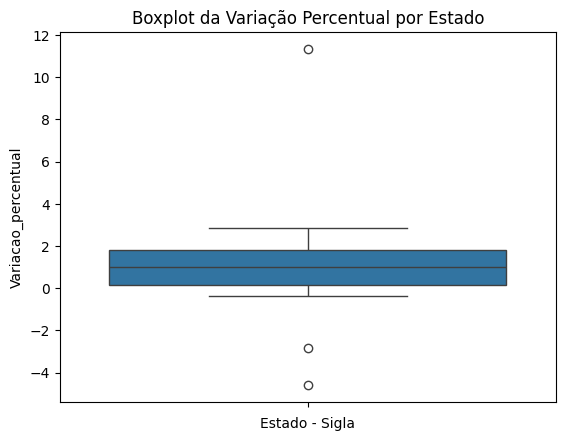

In [ ]:
sns.boxplot(y='Variacao_percentual', data=q11_gasolina)
plt.title('Boxplot da Variação Percentual por Estado')
plt.xlabel('Estado - Sigla')
plt.ylabel('Variacao_percentual')
plt.show()

In [ ]:
# Etanol
q11_etanol = pd.merge(q11_nov_etanol, q11_dez_etanol, on=['Estado - Sigla', 'Produto'], suffixes=('_nov', '_dez'))
q11_etanol['Variação percentual'] = ((q11_etanol['Valor de Venda_dez'] - q11_etanol['Valor de Venda_nov']) / q11_etanol['Valor de Venda_nov']) * 100
q11_etanol = q11_etanol.sort_values(by='Variação percentual', ascending=False)
q11_etanol

,,Valor de Venda_nov,Valor de Venda_dez,Variação percentual
Estado - Sigla,Produto,,,
SE,ETANOL,4.181271,4.596091,9.920900
AL,ETANOL,4.169272,4.436267,6.403886
PB,ETANOL,3.886620,4.064938,4.587981
TO,ETANOL,4.148693,4.334971,4.490048
PE,ETANOL,3.913797,4.079492,4.233608
MS,ETANOL,3.586543,3.707908,3.383917
GO,ETANOL,3.456283,3.548691,2.673625
AM,ETANOL,4.498926,4.606000,2.379986
MT,ETANOL,3.132212,3.206307,2.365570


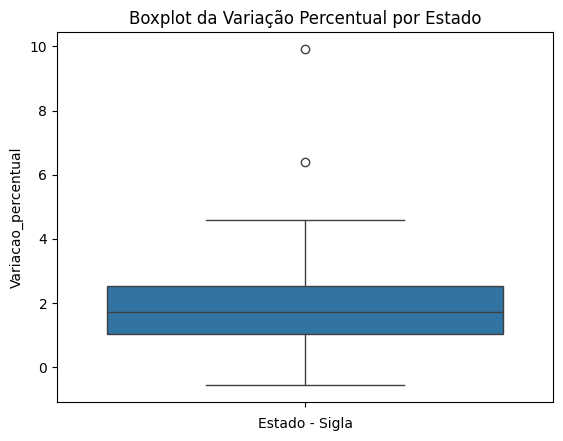

In [ ]:
sns.boxplot(y='Variação percentual', data=q11_etanol)
plt.title('Boxplot da Variação Percentual por Estado')
plt.xlabel('Estado - Sigla')
plt.ylabel('Variacao_percentual')
plt.show()

https://imprensa24h.com.br/gasolina-vai-ficar-mais-cara-em-sergipe/

# **12. Existe uma variação significativa nos preços médios de combustíveis entre diferentes municípios dentro do mesmo estado?** #

In [ ]:
# Criação de Dataframe agrupados por Estado e Municipio e com valor médio de valor de venda para cada municipio
#q12 = df_nov.groupby(['Estado - Sigla','Municipio'])['Valor de Venda'].mean()

#NOVEMBRO
q12 = df.groupby(['Estado - Sigla','Municipio',"Produto"])['Valor de Venda'].mean()

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
#NOVEMBRO
q12_gasolina = q12[q12.index.get_level_values('Produto') == 'GASOLINA']
q12_gasolina = pd.DataFrame(q12_gasolina)

# Selecionar apenas as linhas onde o produto contenha "GASOLINA"
q12_etanol = q12[q12.index.get_level_values('Produto') == 'ETANOL']
q12_etanol = pd.DataFrame(q12_etanol)


In [ ]:
#Cria-se um novo DataFrame agrupados pelo estado, apresentando valor máximo e minimo para cada um deles

#GASOLINA
q12_gasolina = q12_gasolina.groupby(['Estado - Sigla']).agg({'Valor de Venda': ['min', 'max']})


#ETANOL
q12_etanol = q12_etanol.groupby(['Estado - Sigla']).agg({'Valor de Venda': ['min', 'max']})


In [ ]:
#Gasolina

# Adicionamos uma coluna que mostra a variação percentual entre o valor máximo e minimo
q12_gasolina['Variação %'] = ((q12_gasolina['Valor de Venda']['max'] - q12_gasolina['Valor de Venda']['min']) / q12_gasolina['Valor de Venda']['min']) * 100
# Ordenamos pela tabela Variação %, do maior para o menor
q12_gasolina_sorted = q12_gasolina.sort_values(by='Variação %', ascending=False).rename(columns={"Valor de Venda": "Gasolina - Valor de Venda"})
q12_gasolina_sorted

Gasolina - Valor de Venda           Variação %
                                     min       max           
Estado - Sigla                                               
PA                              5.332222  6.846765  28.403589
AM                              6.045526  7.687222  27.155550
RS                              5.221875  6.614058  26.660595
PE                              5.144595  6.478387  25.926095
MS                              5.327155  6.687500  25.536047
MA                              4.957037  6.005455  21.150084
BA                              5.470000  6.624167  21.099939
GO                              4.903437  5.872025  19.753241
SP                              5.210161  6.233111  19.633746
AL                              5.645099  6.669636  18.149141
ES                              5.378261  6.332078  17.734674
PR                              5.226200  6.151395  17.703022
RJ                              5.391212  6.331284  17.437123
MG                              5.249265  6.116818  16.527143
MT                              5.497031  6.365000  15.789773
CE                              5.480395  6.298592  14.929523
AC                              6.623796  7.447358  12.433386
SC                              5.404598  5.987800  10.790855
TO                              5.655227  6.146250   8.682635
RN                              5.605400  5.990000   6.861241
PB                              5.463571  5.801944   6.193257
RO                              6.251944  6.623939   5.950068
PI                              5.288278  5.569643   5.320548
SE                              5.514340  5.764590   4.538178
AP                              5.512417  5.743077   4.184376
RR                              5.892336  5.892336   0.000000
DF                              5.532317  5.532317   0.000000

In [ ]:
#Etanol

# Adicionamos uma coluna que mostra a variação percentual entre o valor máximo e mínimo
q12_etanol['Variação %'] = ((q12_etanol['Valor de Venda']['max'] - q12_etanol['Valor de Venda']['min']) / q12_etanol['Valor de Venda']['min']) * 100

# Ordenamos pela tabela Variação %, do maior para o menor
q12_etanol_sorted = q12_etanol.sort_values(by='Variação %', ascending=False).rename(columns={"Valor de Venda": "Etanol - Valor de Venda"})
q12_etanol_sorted

Etanol - Valor de Venda           Variação %
                                   min       max           
Estado - Sigla                                             
PA                            3.939857  6.088125  54.526542
MS                            3.314643  4.630000  39.683224
RS                            3.969565  5.421579  36.578659
GO                            2.886066  3.903182  35.242312
RN                            4.163514  5.590000  34.261603
SP                            2.975357  3.989375  34.080543
AL                            3.961793  5.207273  31.437271
PE                            3.734286  4.891364  30.985254
SC                            4.013896  5.227143  30.226162
RJ                            3.835789  4.932857  28.600831
MG                            3.248803  4.136364  27.319627
PR                            3.256596  4.092683  25.673656
BA                            3.932500  4.878284  24.050441
AC                            4.699167  5.790000  23.213336
MA                            4.011226  4.895000  22.032503
CE                            4.126883  4.968889  20.402947
RO                            4.691250  5.423333  15.605294
MT                            3.067619  3.545000  15.561937
PB                            3.863400  4.458750  15.410002
PI                            3.996040  4.443056  11.186475
TO                            4.057143  4.495455  10.803457
ES                            3.909667  4.271389   9.251996
SE                            4.132727  4.437368   7.371431
AM                            4.535000  4.860000   7.166483
AP                            5.368571  5.600000   4.310804
DF                            3.600460  3.600460   0.000000
RR                            4.872857  4.872857   0.000000

In [ ]:
# Analise de Caso
# Variação % = 0

resultados_DF = q12.loc['DF']

# motivo: apenas 1 municipio

In [ ]:
# Analise de Caso
# Variação % = 0

resultados_RR = q12.loc['RR']

# motivo: apenas 1 municipio

In [ ]:
# Analise de Caso
# Variação % = Maior - Gasolina

resultados_PA = pd.DataFrame(q12.loc['PA'])
gasolina_PA = resultados_PA[resultados_PA.index.get_level_values('Produto') == 'GASOLINA'].sort_values(by='Valor de Venda', ascending=False)
gasolina_PA
# motivo: Grandes distancias

,,Valor de Venda
Municipio,Produto,
XINGUARA,GASOLINA,6.846765
ALTAMIRA,GASOLINA,6.738333
ALENQUER,GASOLINA,6.575455
PARAUAPEBAS,GASOLINA,6.508919
PARAGOMINAS,GASOLINA,6.304375
...,...,...
VITORIA DE SANTO ANTAO,GASOLINA,NaN
VOLTA REDONDA,GASOLINA,NaN
VOTORANTIM,GASOLINA,NaN


In [ ]:
# Analise de Caso
# Variação % = Maior - Etanol

etanol_PA = resultados_PA[resultados_PA.index.get_level_values('Produto') == 'ETANOL'].sort_values(by='Valor de Venda', ascending=False)
etanol_PA


,,Valor de Venda
Municipio,Produto,
SANTAREM,ETANOL,6.088125
ALENQUER,ETANOL,5.900000
XINGUARA,ETANOL,5.625000
CONCEICAO DO ARAGUAIA,ETANOL,5.471429
ALTAMIRA,ETANOL,4.981111
...,...,...
VITORIA DE SANTO ANTAO,ETANOL,NaN
VOLTA REDONDA,ETANOL,NaN
VOTORANTIM,ETANOL,NaN


# **13. Qual é a bandeira que apresenta a maior variação percentual nos preços médios da gasolina e do etanol entre os dois meses?** #

In [ ]:
#Preço médio de cada bandeira em novembro
q13nov = df_nov.groupby(['Bandeira','Produto'])['Valor de Venda'].mean()

In [ ]:
#Preço médio de cada bandeira em dezembro
q13dez = df_dez.groupby(['Bandeira','Produto'])['Valor de Venda'].mean()


In [ ]:
# Gasolina
q13nov_gasolina = q13nov[q13nov.index.get_level_values('Produto') == 'GASOLINA']
q13dez_gasolina = q13dez[q13dez.index.get_level_values('Produto') == 'GASOLINA']

# Etanol
q13nov_etanol = q13nov[q13nov.index.get_level_values('Produto') == 'ETANOL']
q13dez_etanol = q13dez[q13dez.index.get_level_values('Produto') == 'ETANOL']


In [ ]:
# União das duas séries anteriores, onde índicie = "bandeira"
q13merge_gasolina = pd.merge(q13nov_gasolina, q13dez_gasolina, on='Bandeira',suffixes=(' Nov', ' Dez'))
q13merge_gasolina  = pd.DataFrame(q13merge_gasolina ).dropna()


# União das duas séries anteriores, onde o índice é "bandeira"
q13merge_etanol = pd.merge(q13nov_etanol, q13dez_etanol, on='Bandeira', suffixes=(' Nov', ' Dez'))
q13merge_etanol = pd.DataFrame(q13merge_etanol).dropna()


In [ ]:
# Criação da coluna Variação %' entre Nov e Dez
#Gasolina
q13merge_gasolina['Variação %'] = ((q13merge_gasolina['Valor de Venda Dez'] - q13merge_gasolina['Valor de Venda Nov']) / q13merge_gasolina['Valor de Venda Nov']) * 100
q13merge_gasolina = q13merge_gasolina.sort_values(by='Variação %', ascending=False).rename_axis("Bandeira (Etanol)")
q13merge_gasolina.head(5)


,Valor de Venda Nov,Valor de Venda Dez,Variação %
Bandeira (Etanol),,,
PETROX DISTRIBUIDORA,5.464091,6.120000,12.003993
FEDERAL ENERGIA,5.133750,5.343000,4.075968
ATLÂNTICA,5.643333,5.843333,3.544005
TDC DISTRIBUIDORA,5.162500,5.327778,3.201507
CIAPETRO,5.528846,5.690417,2.922319


In [ ]:
# Criação da coluna Variação %' entre Nov e Dez
# Etanol
q13merge_etanol['Variação %'] = ((q13merge_etanol['Valor de Venda Dez'] - q13merge_etanol['Valor de Venda Nov']) / q13merge_etanol['Valor de Venda Nov']) * 100
q13merge_etanol = q13merge_etanol.sort_values(by='Variação %', ascending=False).rename_axis("Bandeira (Gasolina)")
q13merge_etanol.head(5)

,Valor de Venda Nov,Valor de Venda Dez,Variação %
Bandeira (Gasolina),,,
PETROX DISTRIBUIDORA,3.985909,4.651905,16.708752
D`MAIS,3.160000,3.370000,6.645570
TEMAPE,3.715000,3.940000,6.056528
FEDERAL ENERGIA,3.591250,3.765000,4.838148
CIAPETRO,3.487692,3.652083,4.713461


In [ ]:
# Analise de Caso: PETROX DISTRIBUIDORA
q13_Petrox_nov = df_nov.groupby(['Bandeira','Estado - Sigla'])['Valor de Venda'].mean().loc['PETROX DISTRIBUIDORA']
q13_Petrox_dez = df_dez.groupby(['Bandeira','Estado - Sigla'])['Valor de Venda'].mean().loc['PETROX DISTRIBUIDORA']
q13_Petrox = pd.merge(q13_Petrox_nov, q13_Petrox_dez, on='Estado - Sigla',suffixes=(' Nov', ' Dez'))
q13_Petrox

# Só Atua em um Estado - Sergipe -> Estado que Destoa (Visto na Questão 11)

,Valor de Venda Nov,Valor de Venda Dez
Estado - Sigla,,
AC,NaN,NaN
AL,NaN,NaN
AM,NaN,NaN
AP,NaN,NaN
BA,NaN,NaN
CE,NaN,NaN
DF,NaN,NaN
ES,NaN,NaN
GO,NaN,NaN


https://imprensa24h.com.br/gasolina-vai-ficar-mais-cara-em-sergipe/